In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from Regression import LinearRegression

data=pd.read_csv('train.csv')
data



,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1820,1,240,1026,1133,2,8,1925,1950,184000
1,7,1646,1,240,918,918,2,7,1941,1950,164000
2,5,1316,2,484,926,926,1,6,1929,2001,130000
3,10,2402,3,672,3094,2402,2,10,2008,2008,555000
4,7,1253,2,402,1237,1253,2,6,1995,1996,176000
...,...,...,...,...,...,...,...,...,...,...,...
1163,6,1400,2,440,672,672,1,6,1978,1978,149500
1164,7,1472,2,402,384,802,2,7,1991,1992,160000
1165,5,789,1,250,789,789,1,5,1948,1950,115000
1166,6,1661,1,377,992,1661,1,8,1955,1996,165500


In [2]:
data.corr()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
OverallQual,1.000000,0.603589,0.604195,0.586690,0.555323,0.486633,0.550829,0.428002,0.576962,0.549548,0.787325
GrLivArea,0.603589,1.000000,0.474438,0.495726,0.461556,0.572781,0.617897,0.815347,0.217873,0.270112,0.707904
GarageCars,0.604195,0.474438,1.000000,0.886913,0.436260,0.439216,0.502019,0.369048,0.549790,0.432639,0.643677
GarageArea,0.586690,0.495726,0.886913,1.000000,0.502441,0.504978,0.444737,0.361716,0.501448,0.395300,0.643247
TotalBsmtSF,0.555323,0.461556,0.436260,0.502441,1.000000,0.812387,0.319290,0.283903,0.404623,0.295422,0.608507
1stFlrSF,0.486633,0.572781,0.439216,0.504978,0.812387,1.000000,0.386534,0.406709,0.296302,0.245934,0.603542
FullBath,0.550829,0.617897,0.502019,0.444737,0.319290,0.386534,1.000000,0.547162,0.488848,0.437524,0.560434
TotRmsAbvGrd,0.428002,0.815347,0.369048,0.361716,0.283903,0.406709,0.547162,1.000000,0.113217,0.174680,0.530472
YearBuilt,0.576962,0.217873,0.549790,0.501448,0.404623,0.296302,0.488848,0.113217,1.000000,0.595819,0.525857
YearRemodAdd,0.549548,0.270112,0.432639,0.395300,0.295422,0.245934,0.437524,0.174680,0.595819,1.000000,0.497762


In [3]:
import numpy as np

class LinearRegression:

    def __init__(self, lr=0.001, n_iters=2000):
        self.lr=lr
        self.n_iters= n_iters
        self.weights= None
        self.base= None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias=0

        for _ in range(self.n_iters):   
          y_pred = np.dot(X, self.weights) + self.bias

          dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
          db = (1/n_samples) * np.sum(y_pred-y)

          self.weights = self.weights - self.lr * dw
          self.bias = self.bias - self.lr * db   

    def predict(self, X):
        y_pred = np.dot(X,self.weights) + self.bias
        return y_pred    

In [4]:
data['TotArea']= data['GrLivArea'] + data['1stFlrSF'] + data['GarageArea'] + data['TotalBsmtSF']

saleprice= data['SalePrice']
data = data.drop(['SalePrice'],axis=1)
data['saleprice']= saleprice
data.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,TotArea,saleprice
0,7,1820,1,240,1026,1133,2,8,1925,1950,4219,184000
1,7,1646,1,240,918,918,2,7,1941,1950,3722,164000
2,5,1316,2,484,926,926,1,6,1929,2001,3652,130000
3,10,2402,3,672,3094,2402,2,10,2008,2008,8570,555000
4,7,1253,2,402,1237,1253,2,6,1995,1996,4145,176000


In [5]:
test=pd.read_csv('test.csv')

test['TotArea']= test['GrLivArea'] + test['1stFlrSF'] + test['GarageArea'] + test['TotalBsmtSF']

saleprice= test['SalePrice']
test = test.drop(['SalePrice'],axis=1)
test['saleprice']= saleprice
test.head()


,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,TotArea,saleprice
0,8,1970,3,753,1085,1120,2,8,2006,2006,4928,281000
1,6,1632,1,338,1240,1632,2,6,1958,1988,4842,139000
2,7,1223,2,480,600,520,2,4,2005,2005,2823,147400
3,5,1559,2,812,1559,1559,1,5,1948,1973,5489,153500
4,4,630,1,286,630,630,1,3,1970,2002,2176,86000


In [6]:
X_train, y_train = data.iloc[:,:11].values, data.iloc[:,-1].values
X_train.shape, y_train.shape


((1168, 11), (1168,))

In [7]:
X_test, y_test = test.iloc[:,:11].values, test.iloc[:,-1].values
X_test.shape, y_test.shape
print(X_train)
y_train
X_test

[[   7 1820    1 ... 1925 1950 4219]
 [   7 1646    1 ... 1941 1950 3722]
 [   5 1316    2 ... 1929 2001 3652]
 ...
 [   5  789    1 ... 1948 1950 2617]
 [   6 1661    1 ... 1955 1996 4691]
 [   7 1442    2 ... 1990 1990 4808]]


array([[   8, 1970,    3, ..., 2006, 2006, 4928],
       [   6, 1632,    1, ..., 1958, 1988, 4842],
       [   7, 1223,    2, ..., 2005, 2005, 2823],
       ...,
       [   6,  848,    2, ..., 2003, 2003, 2964],
       [   7, 1266,    2, ..., 2007, 2007, 4186],
       [   6, 1484,    2, ..., 2005, 2007, 3443]], dtype=int64)

In [8]:
#Feature Scaling
X_train = (X_train - X_train.mean(axis = 0)) / ( X_train.max(axis = 0) - X_train.min(axis = 0) )
X_test = (X_test - X_test.mean(axis = 0)) / ( X_test.max(axis = 0) - X_test.min(axis = 0) )
X_train
X_test


array([[ 0.21385084,  0.15305197,  0.31592466, ...,  0.25948367,
         0.34189498,  0.08771873],
       [-0.00837139,  0.04499571, -0.18407534, ..., -0.1097471 ,
         0.04189498,  0.07787667],
       [ 0.10273973, -0.08575877,  0.06592466, ...,  0.25179136,
         0.32522831, -0.15318307],
       ...,
       [-0.00837139, -0.20564368,  0.06592466, ...,  0.23640674,
         0.29189498, -0.13704666],
       [ 0.10273973, -0.07201196,  0.06592466, ...,  0.26717597,
         0.35856164,  0.00280228],
       [-0.00837139, -0.00231887,  0.06592466, ...,  0.25179136,
         0.35856164, -0.08222862]])

<function matplotlib.pyplot.show(close=None, block=None)>

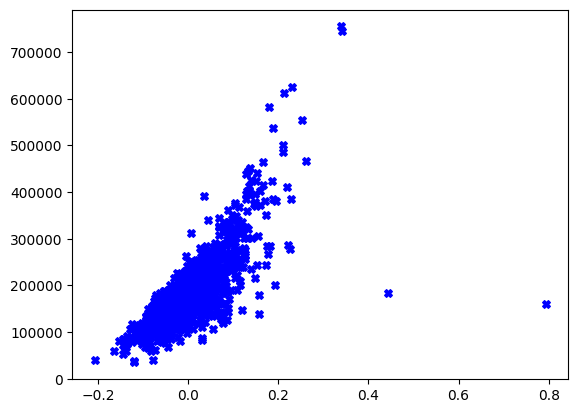

In [9]:
fig = plt.figure()
plt.scatter(X_train[:, 10],y_train, color = "b", marker = "X", s = 30)
plt.show

In [10]:

reg = LinearRegression(lr=0.001, n_iters= 50000)
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

In [11]:
print(predictions)

[282373.99592311 184629.53597207 169052.94389456 184613.63304545
  66844.46790337  99417.86464053  98574.69594673 211379.08305351
 202843.14855011 148776.47737323 220001.31238202 114991.05294481
 157595.63726747 145791.22449456 299088.68370159 164599.95190091
 210657.00058944 232269.96559395 154808.83530465 139089.40020116
 232405.2947009  277222.88833037 198983.74035788 131939.3126697
 246798.83286417 142094.12414769 212840.74821328 100590.95560007
 149256.68798088 171328.54642723 302228.09256584 202961.62269651
 192721.46122427 123199.43028905 136612.79321413 157213.24209166
   -894.73913664 230552.99693738 392172.57551684 190713.79953093
 139637.81045238 127792.02283109  55522.96416583  61226.4419429
 134629.18287538 156041.10171098  81564.29154815 238463.4727566
 121193.23028963 136105.03417832 116979.92464472 237680.39166491
 262648.55528052 241285.74471484 113087.15754484 105338.9561273
 224718.74555536 237764.76792054 226837.80430865  83914.13243755
 186312.49088173 193092.40166

In [12]:
def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

In [13]:
mse = mse(y_test, predictions)
print(mse)

1327539159.6607356


In [14]:

r2 = 1 - ( (np.sum(np.square(y_test - predictions))) / (np.sum( np.square(y_test - y_test.mean()) )) )
r2

0.779790899966785